In [21]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

clean_path = '../clean/'
noise_path = '../noise/'

clean_left = np.load(clean_path+'clean_stft_left.npy')
clean_right = np.load(clean_path+'clean_stft_right.npy')

noise_left = np.load(noise_path+'noise_stft_left.npy')
noise_right = np.load(noise_path+'noise_stft_right.npy')



In [22]:
print (clean_left.shape)
print (noise_left.shape)

(221, 257, 382)
(26, 257, 382)


In [23]:
x_data = []
y_data = []

In [24]:
def xy_data (clean, idx, noise, label):
    clean_idx = clean[idx,:,:]
    noise_lab = noise[label,:,:]
    
    x_stft = clean_idx + noise_lab
    
    x_element,_ = librosa.magphase(x_stft)
    noise_mag,_ = librosa.magphase(noise_lab)

    x_element = librosa.amplitude_to_db(x_element)
    noise_mag = librosa.amplitude_to_db(noise_mag)
    
    x_element = x_element.reshape(1,257,382)
    noise_mag = noise_mag.reshape(1,257,382)

    return x_element, noise_mag 

In [25]:

for idx in range( clean_left.shape[0] ):
    
    label_list = np.random.choice( len(noise_left), 10, replace=False)
    
    for label in list(label_list[:5]):
        xy = xy_data( clean_left, idx, noise_left, label )
        x_data.append( xy[0] )
        y_data.append( xy[1] )
        
        
    for label in list(label_list[5:]):
        xy = xy_data( clean_right, idx, noise_right, label )
        x_data.append( xy[0] )
        y_data.append( xy[1] )
        
    

In [26]:
print(len(x_data))
print(len(y_data))

print(x_data[0].shape)
print(y_data[0].shape)

2210
2210
(1, 257, 382)
(1, 257, 382)


In [27]:
x_data = np.vstack(x_data)
y_data = np.vstack(y_data)

<IPython.core.display.Javascript object>


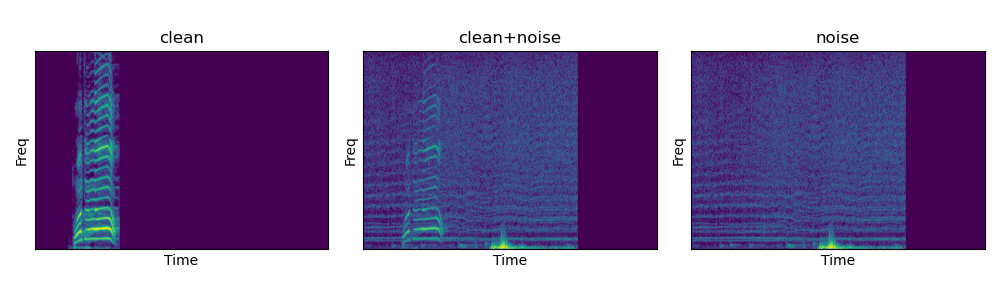

In [32]:
%matplotlib notebook

index = 90
db = librosa.amplitude_to_db( np.abs( clean_left[index,:,:382]) )
noise  = (y_data[(2*index)*5+2,:,:382])
noisy_a =(x_data[(2*index)*5+2,:,:382])

x = [db, noisy_a, noise]
title=['clean', 'clean+noise', 'noise']

fig = plt.figure(figsize=(10,3))
row, col = 1,3
for i,mag in enumerate(x):
    ax = fig.add_subplot(row, col, i+1)
    im = ax.imshow(mag, origin='lower')
    ax.set_title(title[i])
    ax.set_xlabel('Time'), ax.set_ylabel('Freq')
    ax.set_xticks([]),     ax.set_yticks([])
    #fig.colorbar(im, shrink=0.4)

plt.tight_layout()
plt.show()

In [29]:
np.save('x_data.npy', x_data)
np.save('y_data.npy', y_data)